<a href="https://colab.research.google.com/github/kebabee/autoencoder-memory/blob/main/hopfield_capacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

class hopfield_net:
    def __init__(self, num_of_neurons): # constructor
        self.num_of_neurons = num_of_neurons
        self.num_of_patterns = 0
        self.weights = np.random.uniform(-0.3,0.3,(num_of_neurons, num_of_neurons)) #weight matrix, random numbers on the beginning
        np.fill_diagonal(self.weights, 0) # w_ii = 0
        self.patterns = [] # vector with patterns

    def learn(self, patterns): # Hebb's learning
        for patt in patterns:
          self.patterns.append(patt)
        self.num_of_patterns += len(patterns)
        for i in range(self.num_of_neurons):
            for j in range(self.num_of_neurons):
                if i != j:
                    for pattern in patterns: # for every pattern
                        self.weights[i][j] += pattern[i] * pattern[j] / self.num_of_patterns # updating weights

    def syn_test(self, data, max=10): # modyfikacja synchroniczna
        for i in range(max):
            new_data = np.dot(self.weights, data) # obliczanie aktywacji każdego neuronu
            new_data = np.where(new_data >= 0, 1, -1) # aktualizacja stanu zgodnie z sgn(x)

            # jeśli stan sieci nie ulega zmianie to kończymy działanie
            if (np.array_equal(data,new_data)):
                return new_data

            data = new_data #nadpisywanie danych
        return data

    def asyn_test(self, data, max=10): # asynchronic updates of neurons
        for i in range(max):
            new_data = np.copy(data)
            indices = list(range(len(data)))  # list of neuron indexes
            random.shuffle(indices)

            for index in indices: # updates in random order
                activation = np.dot(self.weights[index], new_data)
                new_data[index] = 1 if activation >= 0 else -1

            if np.array_equal(data, new_data):
                return new_data

            data = new_data  # update data

        return data


def add_noise(images, noise_factor):
    noisy_images = images.copy()
    n_pixels = int(noise_factor * images.shape[1])
    for img in noisy_images:
        noise_idx = np.random.choice(images.shape[1], n_pixels, replace=False)
        for i in range(n_pixels):
            img[noise_idx[i]] = 0
    return noisy_images

In [2]:
# from a = 10/200 = 0.05 to a = 20/200 = 0.1
num_vectors = 20
vector_length = 200
errors200 = []

for _ in range(5):

  vectors200 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors200.append(vector)

  err200_1 = []

  for i in range(10,20):
    net = hopfield_net(200)
    net.learn(vectors200[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors200[j],100)
      err += np.sum(vectors200[j] != result)

    print(err/i/2)
    err200_1.append(err/i/2)

  errors200.append(err200_1)

0.05
0.0
0.0
0.038461538461538464
0.10714285714285714
0.5333333333333333
0.65625
1.1470588235294117
2.138888888888889
4.7894736842105265
0.0
0.0
0.0
0.0
0.03571428571428571
0.03333333333333333
0.34375
0.7647058823529411
2.0
2.0526315789473686
0.0
0.0
0.0
0.038461538461538464
0.10714285714285714
0.03333333333333333
0.28125
1.3823529411764706
0.5833333333333334
4.894736842105263
0.0
0.0
0.0
0.038461538461538464
0.14285714285714285
0.16666666666666666
0.25
0.7352941176470589
0.8333333333333334
1.4210526315789473
0.0
0.09090909090909091
0.0
0.038461538461538464
0.0
0.06666666666666667
0.34375
0.20588235294117646
0.5555555555555556
0.4473684210526316


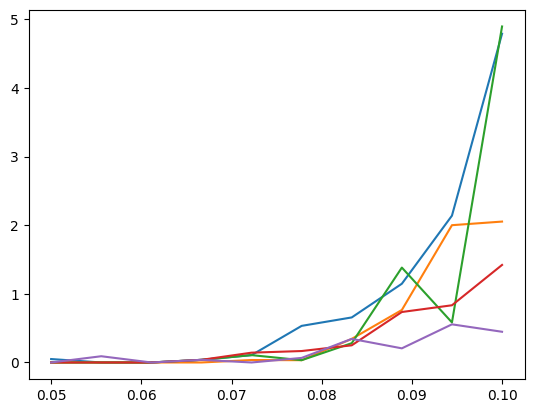

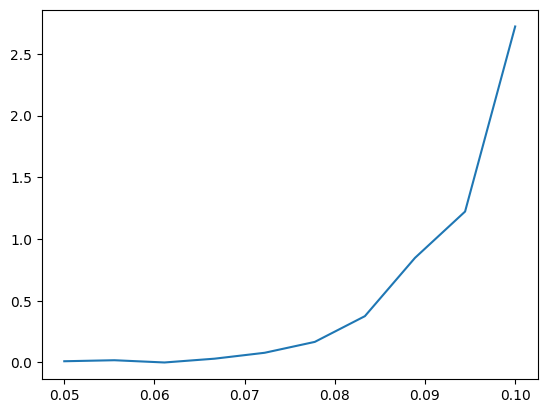

In [4]:
t = np.linspace(0.05, 0.1, 10)
for i in range(5):
  plt.plot(t, errors200[i])
plt.show()

mean_errors200 = np.mean(errors200, axis=0)
plt.plot(t, mean_errors200)
plt.show()

In [5]:
# from a = 20/400 = 0.05 to a = 40/400 = 0.1
num_vectors = 40
vector_length = 400
errors400 = []

for _ in range(5):

  vectors400 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors400.append(vector)

  err400_1 = []

  for i in range(20,40):
    net = hopfield_net(400)
    net.learn(vectors400[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors400[j], 100)
      err += np.sum(vectors400[j] != result)

    print(err/i/4)
    err400_1.append(err/i/4)

  errors400.append(err400_1)

0.0
0.011904761904761904
0.06818181818181818
0.08695652173913043
0.15625
0.17
0.15384615384615385
0.21296296296296297
0.4375
0.35344827586206895
0.8833333333333333
0.9274193548387096
0.9765625
1.4772727272727273
1.7720588235294117
4.314285714285714
3.2222222222222223
6.716216216216216
8.296052631578947
12.653846153846153
0.0
0.0
0.056818181818181816
0.010869565217391304
0.07291666666666667
0.07
0.16346153846153846
0.1388888888888889
0.20535714285714285
0.33620689655172414
0.5333333333333333
0.5080645161290323
0.90625
0.8939393939393939
1.5073529411764706
1.2571428571428571
2.3402777777777777
3.1554054054054053
10.421052631578947
6.230769230769231
0.0625
0.03571428571428571
0.06818181818181818
0.08695652173913043
0.125
1.36
0.3269230769230769
0.25925925925925924
0.7232142857142857
0.7413793103448276
0.5833333333333334
2.75
2.125
2.0681818181818183
5.507352941176471
8.114285714285714
8.090277777777779
9.702702702702704
12.703947368421053
13.211538461538462
0.025
0.0
0.09090909090909091
0

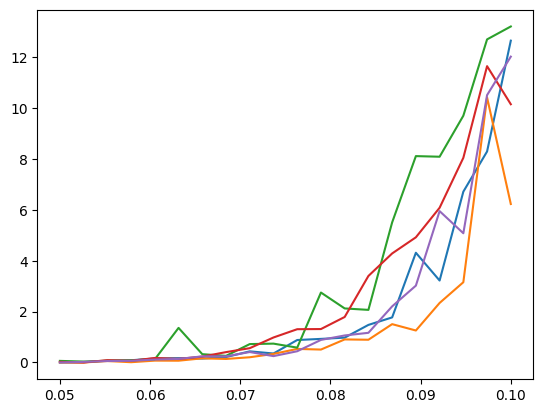

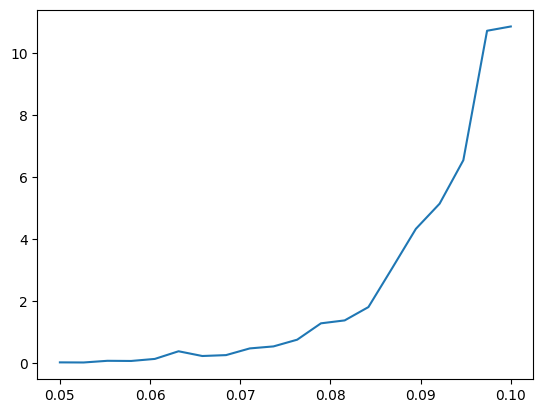

In [6]:
t = np.linspace(0.05, 0.1, 20)
for i in range(5):
  plt.plot(t, errors400[i])
plt.show()

mean_errors400 = np.mean(errors400, axis=0)
plt.plot(t, mean_errors400)
plt.show()

In [7]:
# from a = 30/600 = 0.05 to a = 60/600 = 0.1
num_vectors = 60
vector_length = 600
errors600 = []

for _ in range(5):

  vectors600 = []
  for _ in range(num_vectors):
    vector = np.random.choice([-1, 1], vector_length)
    vectors600.append(vector)

  err600_1 = []

  for i in range(30, 60):
    net = hopfield_net(600)
    net.learn(vectors600[:i])
    err = 0
    for j in range(i):
      result = net.asyn_test(vectors600[j], 100)
      err += np.sum(vectors600[j] != result)

    print(err/i/6)
    err600_1.append(err/i/6)

  errors600.append(err600_1)

0.06666666666666667
0.11290322580645161
0.08333333333333333
0.18686868686868685
0.22058823529411764
0.3142857142857143
0.24074074074074073
0.27927927927927926
0.5
0.5811965811965812
0.6791666666666667
0.7113821138211383
0.996031746031746
1.3953488372093024
2.106060606060606
2.8703703703703702
4.880434782608696
6.5992907801418434
10.42013888888889
10.346938775510205
13.090000000000002
16.61111111111111
21.14423076923077
20.138364779874212
27.59259259259259
30.863636363636363
33.645833333333336
37.24561403508772
37.13505747126437
38.494350282485875
0.044444444444444446
0.048387096774193554
0.10416666666666667
0.11616161616161617
0.12254901960784315
0.19523809523809524
0.2546296296296296
0.26576576576576577
0.31140350877192985
0.44017094017094016
0.5833333333333334
0.6910569105691057
1.4841269841269842
1.1627906976744187
2.0757575757575757
2.0444444444444447
4.916666666666667
5.971631205673759
8.89236111111111
12.374149659863946
16.653333333333332
17.26797385620915
22.35897435897436
21.64

KeyboardInterrupt: 

In [ ]:
t = np.linspace(0.05, 0.1, 30)
for i in range(5):
  plt.plot(t, errors600[i])
plt.show()

mean_errors600 = np.mean(errors600, axis=0)
plt.plot(t, mean_errors600)
plt.show()